<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/doitdeeplearning_chapter_5_2~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch.5 훈련 노하우를 배웁니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

## 05-3 규제 방법을 배우고 단일층 신경망에 적용합니다
- 가중치 규제(regulariztion) : 가중치의 값이 커지지 않도록 제한하는 기법
  - 과대적합을 해결하는 대표적인 방법 중 하나
  - 모델의 일반화 성능 향상
- '모델이 일반화되지 않았다' 

![graph](https://user-images.githubusercontent.com/52767505/68754705-8bbd3180-064a-11ea-94e2-94046b1b7bee.PNG)![graph_2](https://user-images.githubusercontent.com/52767505/68754732-98da2080-064a-11ea-912b-d5ffd13655e1.PNG)
  - 모델이 몇 개의 데이터에 집착하면 새로운 데이터에 적응하지 못하므로 좋은 성능을 가졌다고 할 수 없다.
- L1 규제와 L2 규제

### L1 규제
- 손실 함수에 가중치의 절댓값인 L1 노름(norm) 추가
  $$\left \| \omega  \right \|_{1}=\sum_{i=1}^{n}\left | \omega _{i} \right |$$
- 로지스틱 손실 함수
  $$L=-(ylog(a)+(1-y)log(1-a))$$
  - $\alpha$ : 규제의 양을 조절하는 파라미터
    $$L=-(ylog(a)+(1-y)log(1-a))+\alpha \sum_{i=1}^{n}\left | \omega _{i} \right |$$
    - $\alpha$ 증가 $\rightarrow$ $\omega$ 값의 합 감소 $\rightarrow$ 규제 강화
    - $\alpha$ 감소 $\rightarrow$ $\omega$ 값의 합 증가, 손실 함수 값의 증가폭 low $\rightarrow$ 규제 약화


### L1 규제의 미분
- 경사 하강법으로 가중치를 업데이트하기 위해 L1 규제를 적용한 로지스틱 손실 함수 미분
- 로지스틱 손실 함수 미분 (04장)
$$\frac{\partial }{\partial \omega _{i}}L=-(y-a)x_{i}$$
$$\frac{\partial }{\partial b}L=-(y-a)1$$
- L1 규제 미분
  $$\frac{\partial }{\partial \omega }L=-(y-a)x+\alpha\times sign(\omega )$$
  - sign($\omega$) : $\omega$ 값을 미분한 결과인 $\omega$의 부호
  - 가중치 업데이트
  $$\omega =\omega -\eta \frac{\partial L}{\partial \omega }=\omega +\eta ((y-a)x-\alpha\times sign(\omega ))$$
- L1 규제를 추가한 로지스틱 손실 함수를 경사 하강법으로 최적화
```
w_grad += alpha * np.sign(w)
```
  - 절편에 대한 규제 $\times$
    - 절편을 규제하면 모델을 어떤 방향으로 이동시킬 뿐, 복잡도에는 영향을 주지 않는다.

- 라쏘 모델(Lasso model) : 회귀 모델에 L1 규제를 추가한 것
  - 사이킷런 : sklearn.linear_model.Lasso 클래스
  - SGDClassifier 클래스 : penalty 매개변수 값을 l1으로 지정
  - 규제의 강도는 alpha 매개변수로 제어
  - 가중치가 0인 특성 : 특성 선택 가능
  - L1 규제는 규제 하이퍼파라미터 $\alpha$에 의존
    - 가중치 크기에 따른 규제의 양이 변하지 않음
    - 규제 효과가 좋지 않음

### L2 규제
- 손실 함수에 가중치에 대한 L2 노름의 제곱을 더함
$$\left \| \omega  \right \|_{2}=\sqrt{\sum_{i=1}^{n}\left | \omega _{i} \right |^{2}}$$
- 로지스틱 손실 함수
$$L=-(ylog(a)+(1-y)log(1-a))+\frac{1}{2}\alpha \sum_{i=1}^{n}\left | \omega_{i}  \right |^{2}$$

### L2 규제의 미분
- L2 규제 미분
$$\frac{\partial }{\partial \omega x}L=(y-a)x+\alpha \times \omega $$
- 가중치 업데이트
$$\omega =\omega -\eta \frac{\partial L}{\partial \omega }=\omega +\eta ((y-a)x+\alpha \times \omega )$$
- L2 규제를 경사 하강법 알고리즘에 적용
```
w_grad += alpha * w
```
  - gradient 계산에 가중치 값 자체를 포함
  - 가중치를 완전히 0으로 만들지 않음 $\rightarrow$ 모델의 복잡도 증가


- 릿지 모델(Ridge model) : 회귀 모델에 L2 규제를 적용한 것
  - 사이킷런 : sklearn.linear_model.Ridge 클래스
  - SDGClassifier 클래스 : penalty 매개변수를 l2로 지정
  - 규제의 강도는 alpha 매개변수로 제어

### L1 규제와 L2 규제 정리
- L1 규제 : gradient에서 alpha에 가중치의 부호를 곱하여 gradient에 더한다.
```
w_grad += alpha * np.sign(w)
```
- L2 규제 : gradient에서 alpha에 가중치를 곱하여 gradient에 더한다.
```
w_grad += alpha * w
```

### 로지스틱 회귀에 규제를 적용합니다.
#### 1. 그레디언트 업데이트 수식에 페널티 항 반영하기
  - `__init__()`메서드에 L1 규제와 L2 규제의 강도를 조절하는 매개변수 l1과 l2를 추가
  - l1과 l2의 기본값은 0 : 규제 적용 안 함

In [0]:
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.l1 = l1
        self.l2 = l2

#### 2. `fit()` 메서드에서 역방향 계산을 수행할 때, 그레디언트에 페널티 항의 미분값을 더함
  - L1 규제와 L2 규제 동시 수행 가능

In [0]:
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])                #가중치 초기화
        self.b = 0                                  #절편 초기화
        self.w_history.append(self.w.copy())        #가중치 기록
        np.random.seed(42)                          #무작위로 시드 지정
        for i in range(epochs):                     #에포크만큼 반복
            loss = 0

            #인덱스를 섞습니다.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                       #모든 샘플에 대해 반복
                z = self.forpass(x[i])              #정방향 계산
                a = self.activation(z)              #활성화 함수 적용
                err = -(y[i] - a)                   #오차 계산
                w_grad, b_grad = self.backprop(x[i], err)     #역방향 계산

                #그레디언트에서 패널티 항의 미분값을 더합니다.
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad          #가중치 업데이트
                self.b -= b_grad                    #절편 업데이트

                #가중치를 기록합니다.
                self.w_history.append(self.w.copy())

                #안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
                a = np.clop(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))

            #에포크마다 평균 손실을 저장합니다.
            self.losses.append(loss / len(y) + self.reg_loss())

            #검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

#### 3. 로지스틱 손실 함수 계산에 페널티 항 추가
  - `reg_loss()` 메서드를 추가
    - 훈련 세트의 로지스틱 손실 함수의 값 계산
    - 검증 세트의 로지스틱 손실 함수의 값 계산

In [0]:
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

#### 4. 검증 세트의 손실을 계산하는 `update_val_loss()` 메서드에서 `reg_loss()`를 호출하도록 수정

In [0]:
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [0]:
class SingleLayer:
    def __init__(self, lr=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = lr
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  
        return z

    def backprop(self, x, err):
        w_grad = x * err  
        b_grad = 1 * err  
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])                
        self.b = 0                                 
        self.w_history.append(self.w.copy())       
        np.random.seed(42)                         
        for i in range(epochs):                    
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      
                z = self.forpass(x[i])           
                a = self.activation(z)          
                err = -(y[i] - a)                 
                w_grad, b_grad = self.backprop(x[i], err)     
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         
                self.b -= b_grad                   
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
            self.losses.append(loss / len(y) + self.reg_loss())
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    
        return np.array(z) > 0                  
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
        
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

#### 5. cancer 데이터 세트에 L1 규제 적용하기
- L1 규제의 강도에 따른 모델의 학습 곡선과 가중치의 변화
  - 학습 곡선 그래프 : 규제 증가 $\rightarrow$ 훈련 세트와 검증 세트의 손실 모두 증가 (과소적합 현상)
  - 가중치 그래프 : 규제 강도 l1 값 증가 $\rightarrow$ 가중치 값이 0에 가까워짐


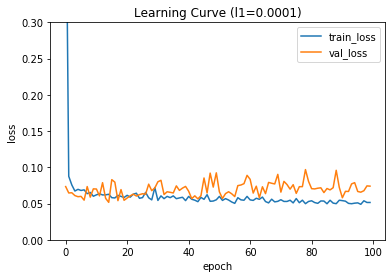

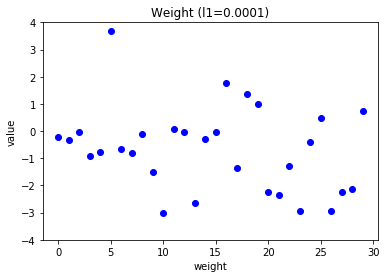

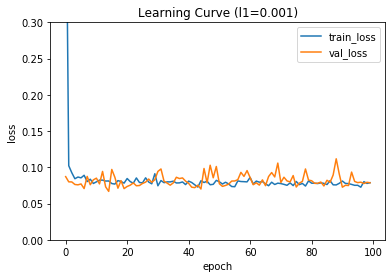

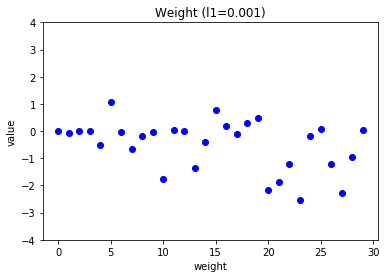

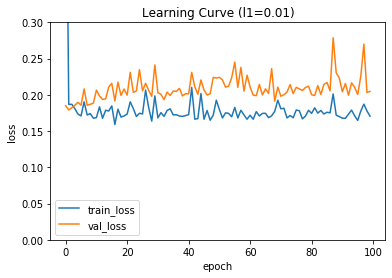

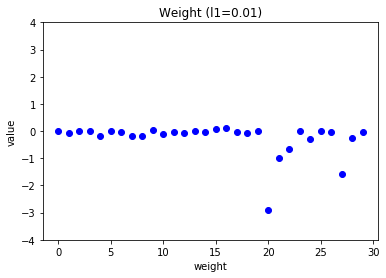

In [8]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

- 적절한 l1 하이퍼파라미터 값 : `l1 = 0.01`

In [9]:
layer5 = SingleLayer(lr=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.9340659340659341

#### 6. cancer 데이터 세트에 L2 규제 적용하기
- L2 규제도 L1 규제와 비슷한 양상을 보임
- 규제 강도가 강해져도(l2=0.01) 과소적합이 심해지지는 않음, 가중치가 너무 0에 가깝게 가지 않음

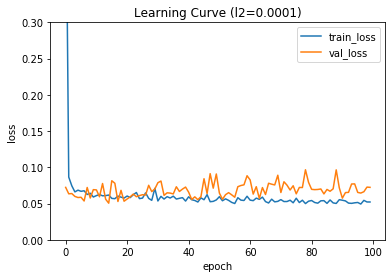

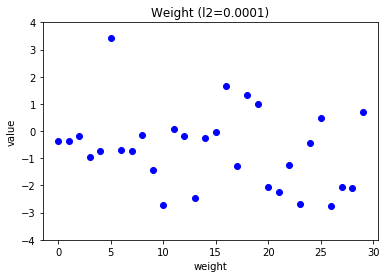

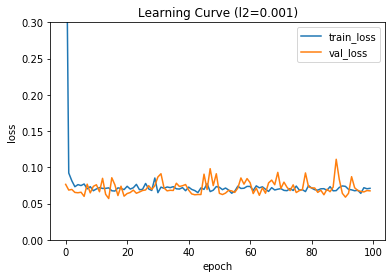

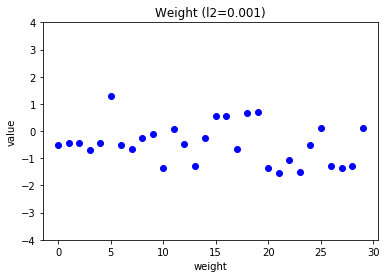

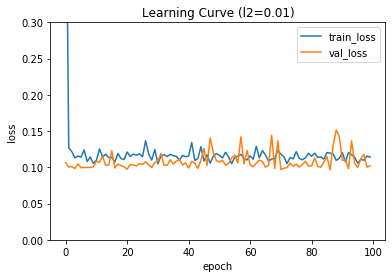

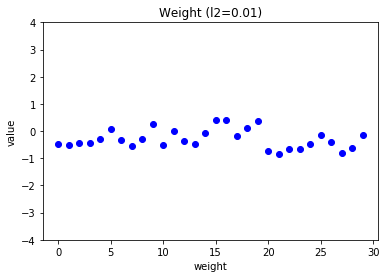

In [10]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

- 성능 평가 : l2=0.01, epochs=50
  - 샘플의 갯수가 적어 L1 규제와 L2 규제에 큰 차이 없음

In [11]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.967032967032967

- 옳게 예측한 샘플의 개수

In [12]:
np.sum(layer6.predict(x_val_scaled) == y_val)

88

#### 7. SGDClassifier에서 규제 사용하기
- penalty 매개변수에 l1이나 l2를 매개변수 값으로 전달
- alpha 매개변수에 규제의 강도 지정
- cancer 데이터 세트를 사용, SGDClassifier 모델에 L2 규제 적용

In [13]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

## 05-4 교차 검증을 알아보고 사이킷런으로 수행해 봅니다.
- 모델을 훈련시킬 데이터가 부족한 경우, 교차 검증(cross validation) 이용

### 교차 검증의 원리를 알아봅시다.
- 폴드(fold) : 훈련 세트를 나눈 작은 덩어리

![폴드](https://user-images.githubusercontent.com/52767505/68755399-c7a4c680-064b-11ea-8b96-5c9f44ef4ad7.PNG)
  - 교차검증
    - 전체 데이터 세트 8:2
    - 8에 해당하는 훈련 세트 / 5
    - 작은 덩어리를 1번씩 검증에 사용, 나머지 덩어리를 훈련에 사용
- 교차 검증 과정
  1. 훈련 세트를 k개의 폴드로 나눕니다. : k-폴드 교차 검증
  2. 첫 번째 폴드를 검증 세트로 사용하고 나머지 폴드(k-1개)를 훈련 세트로 사용합니다.
  3. 모델을 훈련한 다음에 검증 세트로 평가합니다.
  4. 차례대로 다음 폴드를 검증 세트로 사용하여 반복합니다.
  5. k개의 검증 세트로 k번 성능을 평가한 후 계산된 성능의 평균을 내어 최종 성능을 계산합니다.
- k-폴드 교차 검증
  - 모든 훈련 세트가 평가에 1번씩 사용 $\rightarrow$ 검증 점수가 안정적
  - 기존의 훈련 방법보다 더 많은 데이터로 훈련 가능
      - ex) k=10 : 10개의 폴드, 90% 샘플을 훈련에 사용
      - 기존) 훈련 : 검증 : 데이터 = 6 : 2 : 2 $\rightarrow$ 60% 샘플을 훈련에 사용

### k-폴드 교차 검증을 구현합니다.
#### 1. 훈련 세트 사용하기
- 기존
  - 전체 데이터 세트 $\rightarrow$ 훈련 세트 : 테스트 세트 = 8 : 2
  - 훈련 세트 $\rightarrow$ 훈련 세트 : 검증 세트 = 8 : 2
- k-폴드 교차 검증 : 검증 세트가 훈련 세트에 포함
  - x_train_all와 y_train_all를 훈련과 검증에 사용
  - validation_scores 리스트 정의, 각 폴드의 검증 점수 저장
  - validation_scores 리스트의 값 평균으로 최종 검증 점수 계산

In [0]:
validation_scores = []

#### 2. k-폴드 교차 검증 구현하기
- k-폴드 교차 검증을 위한 반복문 구현
  - k = 10
  - bins 변수 : 한 폴드에 들어갈 샘플의 개수
    - 전체 훈련 세트의 샘플 개수를 k로 나눈 것
  - bins 변수의 개수만큼 건너뛰며 검증 폴드와 훈련 폴드를 구분하여 모델 훈련
  - 성능 평가의 평균 점수 np.mean(validation_scores

In [15]:
k = 10
bins = len(x_train_all) // k

for i in range(k):
    start = i*bins
    end = (i+1)*bins
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

0.9711111111111113


- start, end : 검증 폴드 샘플의 시작과 끝 인덱스
- 그 외 : 훈련 폴드 샘플의 인덱스
  - train_index에 list( ) 함수를 이용하여 훈련 폴드의 인덱스 저장

  ![폴드_인덱스](https://user-images.githubusercontent.com/52767505/68757601-8b736500-064f-11ea-8673-0095582f0af0.PNG)
- 훈련 데이터의 표준화 전처리 : 폴드를 나눈 뒤 수행
  - 폴드를 나누기 전 수행 : 검증 폴드의 정보 누설
- validation_scores 리스트 : 반복문은 진행하며 10개의 검증 폴드로 측정한 성능 점수는 저장
- np.mean( ) 함수 : 성능 점수들의 평균 계산
  - 1번 훈련하고 검증 세트로 나눈 방법보다 안정적

### 사이킷런으로 교차 검증을 합니다.
#### 1. cross_validate( ) 함수로 교차 검증 점수 계산하기
- 매개변수 값 : 교차 검증 모델의 객체와 훈련 데이터, 타깃 데이터
- cv 매개변수 : 교차 검증을 수행할 폴드 수 지정


In [16]:
from sklearn.model_selection import cross_validate

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


- cross_validate( ) 함수 : 파이썬 딕셔너리 반환
- scores['test_score'] : 검증 점수 저장
- 교차 검증의 평균 점수 = 85%
  - 낮은 점수
  - 표준화 전처리 수행 $\times$

### 전처리 단계를 포함해 교차 검증을 수행합니다.
- 훈련 세트 전체를 전처리한 후 cross_validate( ) 함수에 매개변수 값으로 전달 $\rightarrow$ 검증 폴드가 표준화 전처리 단계에서 누설

#### Pipeline 클래스를 사용해서 교차 검증 수행하기
- Pipeline 클래스 : 검증 폴드가 전처리 단계에서 누설되지 않도록 전처리 단계와 모델 클래스를 하나로 연결해 주는 클래스
- Pipeline 클래스와 SGDClassifier 클래스의 작동 과정
  1. 표준화 전처리 단계와 SGDClassifier 클래스 객체를 Pipeline 클래스로 감싸 cross_validate( ) 함수에 전달
  2. cross_validate( ) 함수가 훈련 세트를 훈련 폴드와 검증 폴드로 나눔
  3. Pipeline 클래스 객체에서 전처리 단계와 SGDClassifier 클래스 객체의 수행
- 파이프라인 객체 생성 : 사이킷런에서 제공하는 make_pipeline( ) 함수에 전처리 단계와 모델 객체 전달
- 표준화 전처리 수행 : preprocessing 모듈 밑 StandardScaler 클래스
- 파이프라인 객체 생성 후, 교차 검증 점수 출력
  - 평균 검증 점수 증가
    - 표준화 전처리 단계가 훈련 폴드와 검증 폴드에 적절히 적용

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


- 훈련 폴드의 점수 출력
  - cross_validate( ) 함수에 return_train_score 매개변수를 True로 설정

In [18]:
print(np.mean(scores['train_score']))

0.9875478561631581
